In [2]:
# Regression Week 1: Simple Linear Regression Assignment
# Predicting House Prices (One feature)
import graphlab

In [3]:
# In this notebook we will use data on house sales in King County,
# where Seattle is located, to predict house prices using simple
# (one feature) linear regression.

In [30]:
# 1. If you are using SFrame, import graphlab and load in the house
# data, otherwise you can also download the csv. (Note that we will
# be using the training and testing csv files provided). e.g in
# python with SFrames:
sales = graphlab.SFrame('kc_house_data.gl/')

graphlab.canvas.set_target('ipynb')
sales.show(view='Scatter Plot', x='sqft_living',y='price')

In [29]:
# 2. Split data into 80% training and 20% test data. Using SFrame,
# use this command to set the same seed for everyone. e.g. in
# python with SFrames:
train_data, test_data = sales.random_split(.8, seed=0)

In [7]:
# 3. Write a generic function that accepts a column of data (e.g,
# an SArray) ‘input_feature’ and another column ‘output’ and
# returns the Simple Linear Regression parameters ‘intercept’ and
# ‘slope’. Use the closed form solution from lecture to calculate
# the slope and intercept. e.g. in python:

In [8]:
def simple_linear_regression(input_feature, output):
    #                       [  -2 sum_(i=1)^n (y_i-(w_0+w_1*x_i))    ]
    # grad RSS(w_0, w_1) =  [                                        ]
    #                       [ -2 sum_(i=1)^n (y_i-(w_0+w_1*x_i))x_i  ]
    N = len(input_feature)
    # sum_(i=1)^n y_i
    sum_output = sum(output)
    # sum_(i=1)^n x_i
    sum_input = sum(input_feature)
    # sum_(i=1)^n y_i*x_i
    sum_output_input = sum([o*i for o,i in zip(output, input_feature)])
    # sum_(i=1)^n x_i*x_i
    sum_input_input = sum([i*i for i in input_feature])
    
    # Bottom term: ŵ_1
    w_1 = ( sum_output_input - (sum_output*sum_input/N) ) / ( sum_input_input - (sum_input*sum_input/N) )
    # ŵ_0 = <average output value> - <estimate of the slope> * <average input feature>
    w_0 = sum_output/N - (w_1 * sum_input/N)
    
    intercept = w_0
    slope = w_1
    
    return (intercept, slope)

In [9]:
# 4. Use your function to calculate the estimated slope and intercept
# on the training data to predict ‘price’ given ‘sqft_living’. e.g. in
# python with SFrames using:
input_feature = train_data['sqft_living']
output = train_data['price']

In [10]:
squarefeet_intercept,squarefeet_slope = simple_linear_regression(input_feature, output)

In [11]:
# 5. Write a function that accepts a column of data ‘input_feature’,
# the ‘slope’, and the ‘intercept’ you learned, and returns an a
# column of predictions ‘predicted_output’ for each entry in the input
# column. e.g. in python:

In [14]:
def get_regression_predictions(input_feature, intercept, slope):
    return input_feature*slope + intercept

In [15]:
# 6. Quiz Question: Using your Slope and Intercept from (4), What is
# the predicted price for a house with 2650 sqft?
print get_regression_predictions(2650, squarefeet_intercept, squarefeet_slope)

700074.845629


In [16]:
# 9. Note that although we estimated the regression slope and intercept
# in order to predict the output from the input, since this is a simple
# linear relationship with only two variables we can invert the linear
# function to estimate the input given the output!

# Write a function that accept a column of data:‘output’ and the
# regression parameters ‘slope’ and ‘intercept’ and outputs the column
# of data: ‘estimated_input’. Do this by solving the linear function
# output = intercept + slope*input for the ‘input’ variable (i.e.
# ‘input’ should be on one side of the equals sign by itself). e.g.
# in python:
def inverse_regression_predictions(output, intercept, slope):
    return (output - intercept) / slope

In [17]:
# 10. Quiz Question: According to this function and the regression
# slope and intercept from (3) what is the estimated square-feet for
# a house costing $800,000?
print inverse_regression_predictions(800000, squarefeet_intercept, squarefeet_slope)

3004.39624762


In [18]:
# 11. Instead of using ‘sqft_living’ to estimate prices we could use
# ‘bedrooms’ (a count of the number of bedrooms in the house) to
# estimate prices. Using your function from (3) calculate the Simple
# Linear Regression slope and intercept for estimating price based on
# bedrooms. Save this slope and intercept for later (you might want
# to call them e.g. bedroom_slope, bedroom_intercept).

In [19]:
input_feature_ii = train_data['bedrooms']

In [20]:
bedroom_intercept,bedroom_slope = simple_linear_regression(input_feature_ii, output)

In [22]:
print squarefeet_intercept, squarefeet_slope
print bedroom_intercept, bedroom_slope

-47116.0765749 281.958838568
109473.180469 127588.952175


In [36]:
# 12. Now that we have 2 different models compute the RSS from BOTH
# models on TEST data.

# 13. Quiz Question: Which model (square feet or bedrooms) has lowest
# RSS on TEST data? Think about why this might be the case.

def residual_sum_of_squares(input_feature, output, intercept, slope):
    # RSS(w_0,w_1) = sum_(i=1)^n (y_i - (w_0 + w_1*x_i))^2
    RSS = 0
    for y_i, x_i in zip(output, input_feature):
        RSS += (y_i - (intercept + slope*x_i))**2
    return RSS

In [37]:
print "square feet:"
print residual_sum_of_squares(train_data['sqft_living'], train_data['price'], squarefeet_intercept, squarefeet_slope)
print residual_sum_of_squares(test_data['sqft_living'], test_data['price'], squarefeet_intercept, squarefeet_slope)

print "bedrooms:"
print residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bedroom_intercept, bedroom_slope)

square feet:
1.20191835632e+15
2.75402936247e+14
bedrooms:
4.93364582868e+14


In [31]:
import matplotlib.pyplot as plt

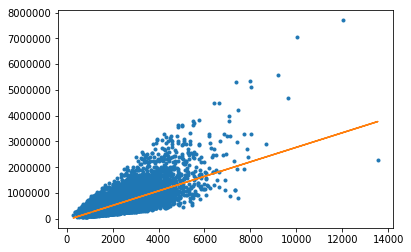

In [33]:
plt.plot(train_data['sqft_living'], train_data['price'], '.',
         train_data['sqft_living'], get_regression_predictions(train_data['sqft_living'], squarefeet_intercept, squarefeet_slope), '-')

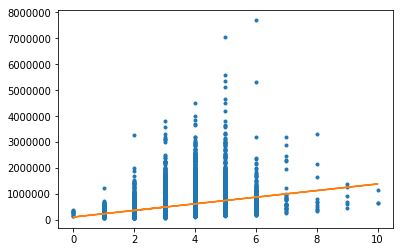

In [38]:
plt.plot(train_data['bedrooms'], train_data['price'], '.',
         train_data['bedrooms'], get_regression_predictions(train_data['bedrooms'], bedroom_intercept, bedroom_slope), '-')